<a href="https://colab.research.google.com/github/easeandrelax/blood-sugar-level/blob/main/Ease_and_relax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧬 Can We Predict Blood Sugar Level from Retinal Images Using ML/DL?
✅ Technically Possible — But Very Challenging
Several studies suggest yes, but with limitations. Here's the breakdown:

🔍 What Research Says:
Google’s DeepMind + UK Biobank Study (2018):

Used retinal fundus images to predict cardiovascular risk factors like:

Age

Gender

Smoking status

HbA1c (a long-term blood sugar measure)

Achieved decent performance, but not perfect.

Published in Nature Biomedical Engineering.

Other academic papers have trained CNNs on retinal images to detect:

Diabetic Retinopathy (which is linked to high blood sugar)

Early signs of Type 2 Diabetes

Predict blood glucose ranges (in controlled datasets)

🔬 Why It's Difficult:
Challenge	Explanation
✅ Indirect relationship	Retinal changes occur due to prolonged high glucose, not immediate levels
⚠️ Data scarcity	Very few public datasets link retina images with actual numerical blood sugar
🧠 Medical noise	Many other factors (blood pressure, age, eye health) affect retina appearance
🩺 Ethical concerns	Requires medical-grade validation before real-world use
💡 But Here's What You Can Do:
You can work on a research prototype like:

✅ Use self-supervised learning (e.g., SimCLR) to learn retina representations

✅ Cluster patients with similar retina features (unsupervised)

🔬 If you get real blood sugar labels later — train a regression model

🎯 Focus on anomaly detection or early risk grouping instead of precise sugar values

first we are mounting the google drive to the colab to import files from drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


next we are  preprocessing the imagees and EDA

Total images found: 864
Processing training images...
Processing test images...


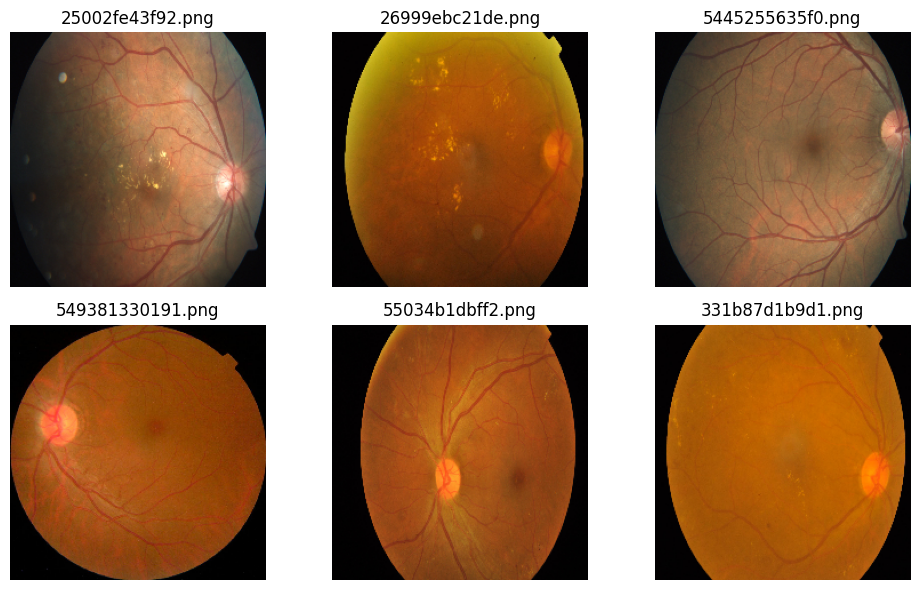

In [2]:
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Your original image folder
IMAGE_DIR = "/content/drive/MyDrive/train_images_preprocessed"

# New folders for train and test split
PROCESSED_DIR = "/content/processed_retina"
TRAIN_DIR = os.path.join(PROCESSED_DIR, "train")
TEST_DIR = os.path.join(PROCESSED_DIR, "test")

# Make folders
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

# Image size
IMG_SIZE = (224, 224)

# List all image paths
all_images = [f for f in os.listdir(IMAGE_DIR) if f.endswith(('.png', '.jpg', '.jpeg'))]
print(f"Total images found: {len(all_images)}")

# Split into train and test (80-20)
train_imgs, test_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

# Helper to preprocess and save images
def preprocess_and_save(images, target_dir):
    for img_name in images:
        src_path = os.path.join(IMAGE_DIR, img_name)
        dst_path = os.path.join(target_dir, img_name)

        try:
            img = Image.open(src_path).convert("RGB")  # Convert to RGB or L for grayscale
            img = img.resize(IMG_SIZE)
            img_array = np.array(img) / 255.0  # Normalize
            img = Image.fromarray((img_array * 255).astype(np.uint8))  # Reconvert to save
            img.save(dst_path)
        except Exception as e:
            print(f"Failed to process {img_name}: {e}")

# Preprocess and save
print("Processing training images...")
preprocess_and_save(train_imgs, TRAIN_DIR)

print("Processing test images...")
preprocess_and_save(test_imgs, TEST_DIR)

# Load some processed images for visualization
sample_images = random.sample(os.listdir(TRAIN_DIR), 6)
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(TRAIN_DIR, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
plt.tight_layout()
plt.show()
